In [91]:
import matplotlib.pyplot as plt
import numpy as np

$ \huge{2.}$ \
\
The plot is shown below:

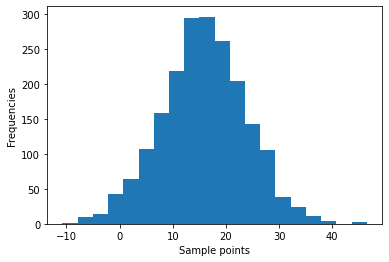

In [92]:
plt.hist(np.random.normal(16, 8, 2000),bins=20)
plt.xlabel('Sample points')
plt.ylabel('Frequencies')
plt.show()

$ \huge{3.}$ \
\
The code is shown below:

In [93]:
def prior(sigma):
  if sigma > 0:
    return 1
  else:
    return 0


$ \huge{4.}$ \
\
The code is shown below:

In [94]:
def transition(mu,sigma):
  return [mu,np.random.normal(sigma,1)]

$ \huge{5.}$ \
\
The code is shown below:

In [95]:
def log_likelihood(D,mu,sigma):
  c = np.sum(-np.log(sigma * np.sqrt(2* np.pi) )-((D-mu)**2) / (2*sigma**2))
  return c

**Reason for taking logarithm:** We consider taking logarithm in order to reduce the computational complexity without compromising on the objective we are working towards, as $log$ is a monotonic function, hence the monotonicity of the likelihood function remains unaffected. 

$ \huge{6.}$ \
\
The code is shown below:

In [96]:
def acceptance(new_theta,old_theta):
  a = False
  accept=np.random.uniform(0,1)
  if new_theta>old_theta:
    a = True
  elif accept < (np.exp(new_theta-old_theta)):
    a = True
  return a

$ \huge{7.}$ \
\
The code is shown below:

In [97]:
def metropolis(mu,sigma,iter,D):
  accepted = []
  accepted1 = []
  rejected = []
  rejected1 = []
  for i in range(iter):
    x = transition(mu,sigma)
    a_old = log_likelihood(D,mu,sigma)
    a_new = log_likelihood(D,x[0],x[1])
    if (acceptance(a_new+np.log(prior(x[1])),a_old+np.log(prior(sigma)))):
      accepted.append(x[1])
      accepted1.append(i)
      mu,sigma = x[0],x[1]
    else:
      rejected.append(x[1])
      rejected1.append(i)
  return accepted, accepted1, rejected, rejected1

In [98]:
D=np.random.normal(16, 8, 2000)
a,b,c,d = metropolis(16,0.1,500,D)
a1,b1,c1,d1 = metropolis(16,0.1,50000,D)

<ipython-input-95-78d1afb24144>:2: RuntimeWarning: invalid value encountered in log
  c = np.sum(-np.log(sigma * np.sqrt(2* np.pi) )-((D-mu)**2) / (2*sigma**2))
<ipython-input-97-ee7009964ce5>:10: RuntimeWarning: divide by zero encountered in log
  if (acceptance(a_new+np.log(prior(x[1])),a_old+np.log(prior(sigma)))):


Text(0, 0.5, 'Standard Deviation')

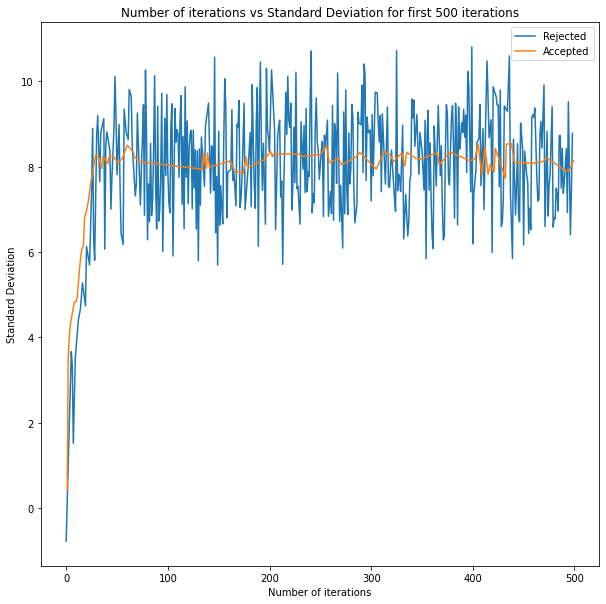

In [99]:
plt.figure(figsize=(10,10))
plt.plot(d,c)
plt.plot(b,a)
plt.legend(['Rejected','Accepted'])
plt.title('Number of iterations vs Standard Deviation for first 500 iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Standard Deviation')

**Observations:** From the plot generated above, we see that the value of $σ$ converges to 8 (accepted value).

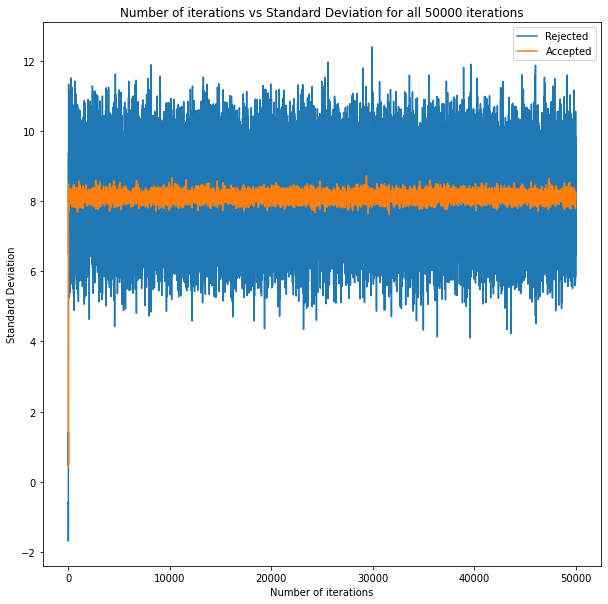

In [100]:
plt.figure(figsize=(10,10))
plt.plot(d1,c1,label='Rejected')
plt.plot(b1,a1,label='Accepted')
plt.legend(['Rejected','Accepted'])
plt.title('Number of iterations vs Standard Deviation for all 50000 iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Standard Deviation')
plt.show()

**Observations:** From the plot generated above, we see that the value of $σ$ converges to 8 (accepted value).

$ \huge{8.}$ \
\
The code is given below:

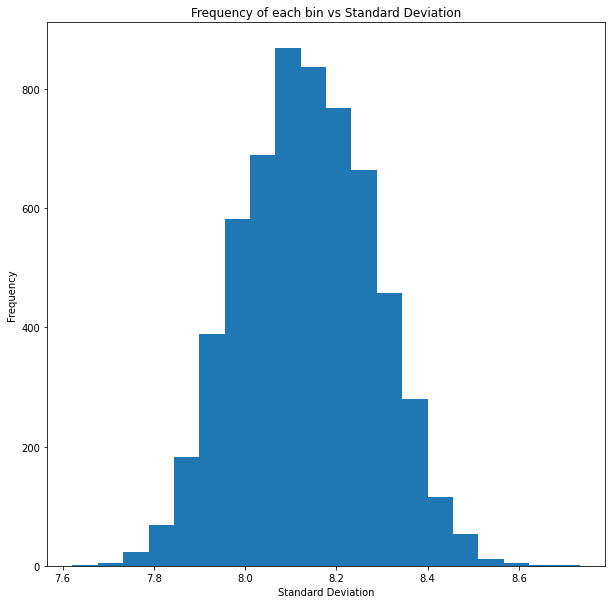

In [101]:
plt.figure(figsize=(10,10))
a2 = a1[int(0.25*len(a1)):]
plt.hist(a2,20)
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Frequency of each bin vs Standard Deviation')
plt.show()

**Observations:** Dropping the first few values makes sense because this might correspond to the warm-up phase of our process before it reaches a steady state.

$ \huge{9.}$ \
\
The required code is given below:

In [102]:
def prior_1(mu,sigma):
  c = 0
  if mu>=8 and mu<=24:
    if sigma>0:
      c = 1/16
  return c

In [103]:
def transition_1(mu,sigma):
  c = np.random.multivariate_normal((mu,sigma),np.identity(2))
  return c

In [104]:
def log_likelihood1(D,mu,sigma):
  c = np.sum(-np.log(sigma * np.sqrt(2* np.pi) )-((D-mu)**2) / (2*sigma**2))
  return c

In [105]:
def metropolis_1(mu,sigma,iter,D):
  acceptedmu = []
  acceptedsigma = []
  for i in range(iter):
    x = transition_1(mu,sigma)
    a_old = log_likelihood1(D,mu,sigma)
    a_new = log_likelihood1(D,x[0],x[1])
    if (acceptance(a_new+np.log(prior_1(x[0],x[1])),a_old+np.log(prior_1(mu,sigma)))):
      acceptedmu.append(x[0])
      acceptedsigma.append(x[1])
      mu,sigma = x[0],x[1]
  return acceptedmu, acceptedsigma


$ \huge{10.}$ \
\
The code is given below:

In [106]:
a1,b1 = metropolis_1(8,0.1,50000,D)
a2 = a1[int(0.25*len(a1)):]
b2 = b1[int(0.25*len(b1)):]

<ipython-input-104-74dc068e1ab5>:2: RuntimeWarning: invalid value encountered in log
  c = np.sum(-np.log(sigma * np.sqrt(2* np.pi) )-((D-mu)**2) / (2*sigma**2))
<ipython-input-105-549c1a0be5cc>:8: RuntimeWarning: divide by zero encountered in log
  if (acceptance(a_new+np.log(prior_1(x[0],x[1])),a_old+np.log(prior_1(mu,sigma)))):


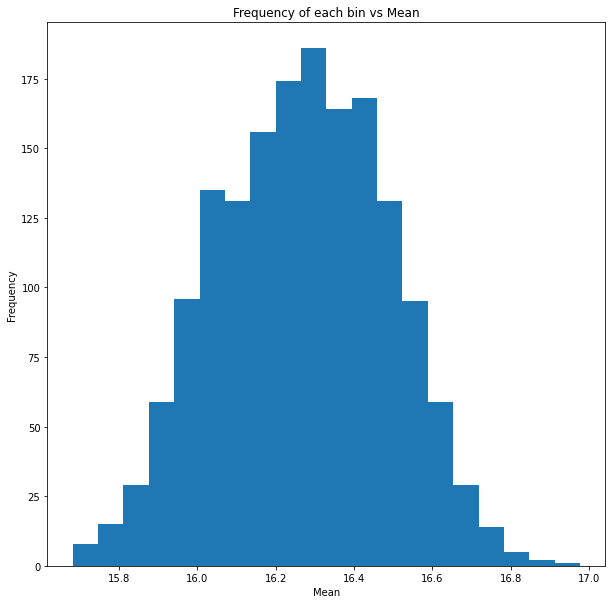

In [107]:
plt.figure(figsize=(10,10))
plt.hist(a2,20)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Frequency of each bin vs Mean')
plt.show()

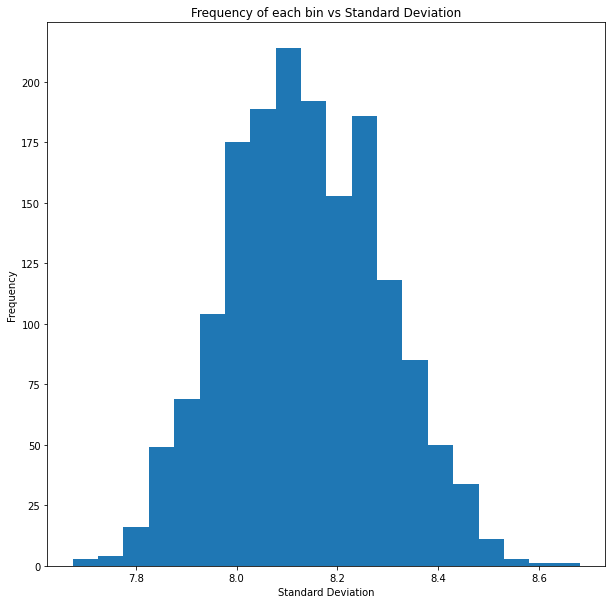

In [108]:
plt.figure(figsize=(10,10))
plt.hist(b2,20)
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Frequency of each bin vs Standard Deviation')
plt.show()